In [1]:
#%pip install dask
#%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st




from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix            
from sklearn.metrics import classification_report       # for detailed classification metrics
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.svm import SVC                            
from sklearn.neighbors import KNeighborsClassifier    

import data

In [3]:
df = pd.read_csv("data/SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


UNDERSTAND DATA

In [4]:
df.describe().round()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0
mean,72.0,22.0,93.0,12.0,91.0,88.0,4.0,64.0,2.0
std,19.0,4.0,4.0,4.0,4.0,12.0,3.0,10.0,1.0
min,45.0,16.0,85.0,4.0,82.0,60.0,0.0,50.0,0.0
25%,52.0,18.0,90.0,8.0,88.0,81.0,0.0,56.0,1.0
50%,70.0,21.0,93.0,11.0,91.0,90.0,4.0,62.0,2.0
75%,91.0,25.0,96.0,16.0,94.0,99.0,6.0,72.0,3.0
max,100.0,30.0,99.0,19.0,97.0,105.0,9.0,85.0,4.0


In [5]:
uniques = df['sl'].unique()
uniques.sort()
uniques

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
df.tail()


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [7]:

df.count()


sr      630
rr      630
t       630
lm      630
bo      630
rem     630
sr.1    630
hr      630
sl      630
dtype: int64

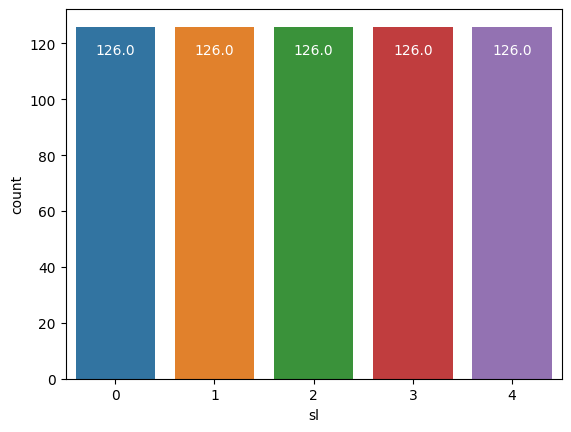

In [8]:
ax=sns.countplot(x=df['sl'], data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=10)




In [9]:
print("Rows and Columns of the dataset :- ",df.shape)

Rows and Columns of the dataset :-  (630, 9)


In [10]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

sr' or 'snoring_rate': <code>&nbsp;&nbsp;&nbsp;&nbsp;</code> The rate or intensity of snoring during sleep, which could be measured in some unit or scale.

'rr' or 'respiration_rate':<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>  The number of breaths taken per minute during sleep.

't' or 'body_temperature': <code>&nbsp;&nbsp;&nbsp;&nbsp;</code>   The body temperature of the user during sleep, possibly measured in degrees Celsius or Fahrenheit.

'lm' or 'limb_movement': <code>&nbsp;&nbsp;&nbsp;&nbsp;</code>   The rate or intensity of limb movement during sleep, indicating how active or restless the person is.

'bo' or 'blood_oxygen': <code>&nbsp;&nbsp;&nbsp;&nbsp;</code>    The blood oxygen level, which represents the amount of oxygen present in the blood during sleep.

'rem' or 'eye_movement':<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>The eye movement activity during sleep, which might indicate the Rapid Eye Movement (REM) phase of sleep.

'sr.1' or 'sleeping_hours':<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>   The number of hours slept during a particular sleep session.

'hr' or 'heart_rate':<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>The number of heartbeats per minute during sleep, an essential physiological parameter related to overall health and sleep quality.

'sl' or 'stress_level':      <code>&nbsp;&nbsp;&nbsp;&nbsp;</code>    The target variable representing the stress level during sleep, categorized into

In [11]:
#df.columns = ['snoring_rate', 'respiration_rate', 'body_temp', 'limb_movem', 'blood_oxygen', 'eye_movem', 'spleeping_hours', 'heart_rate', 'stress level']


In [12]:

df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

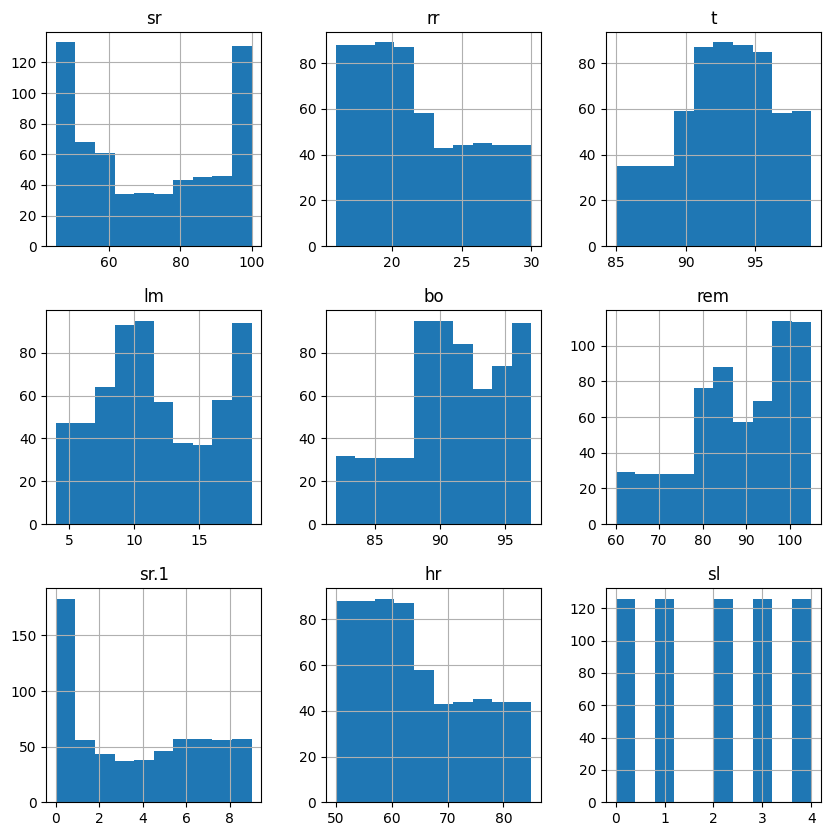

In [14]:
df.hist(figsize=(10,10))

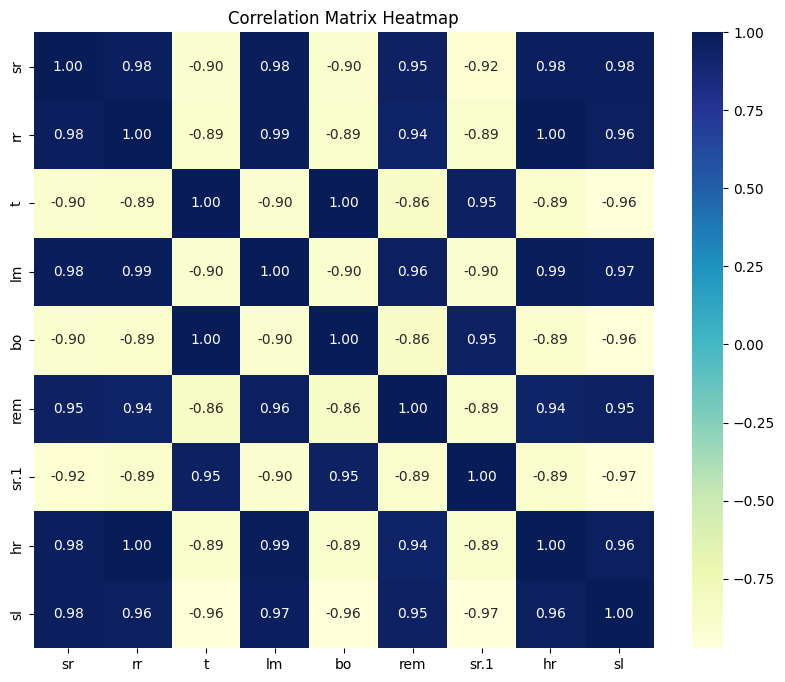

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

train, test split

In [16]:
X = df.drop(['sl'], axis=1)
y = df['sl']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [17]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print()
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X shape:  (630, 8)
y shape:  (630,)

X_train shape: (567, 8)
y_train shape: (567,)
X_test shape: (63, 8)
y_test shape: (63,)


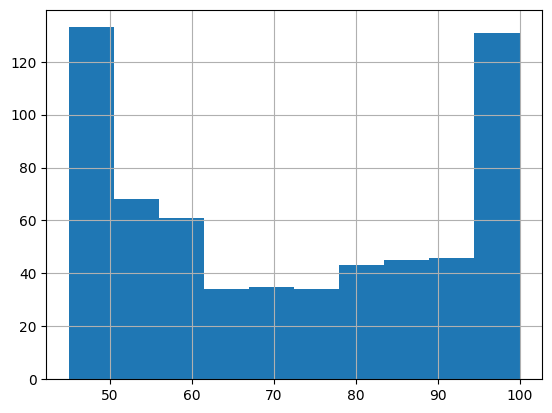

In [18]:
s = df['sr'].hist()



In [19]:
d = df['sr'].unique()
d.sort()
d

array([ 45.   ,  45.04 ,  45.08 ,  45.12 ,  45.16 ,  45.2  ,  45.24 ,
        45.28 ,  45.32 ,  45.36 ,  45.4  ,  45.44 ,  45.48 ,  45.52 ,
        45.56 ,  45.6  ,  45.64 ,  45.68 ,  45.72 ,  45.76 ,  45.8  ,
        45.84 ,  45.88 ,  45.92 ,  45.96 ,  46.   ,  46.04 ,  46.08 ,
        46.12 ,  46.16 ,  46.2  ,  46.24 ,  46.28 ,  46.32 ,  46.36 ,
        46.4  ,  46.44 ,  46.48 ,  46.52 ,  46.56 ,  46.6  ,  46.64 ,
        46.68 ,  46.72 ,  46.76 ,  46.8  ,  46.84 ,  46.88 ,  46.92 ,
        46.96 ,  47.   ,  47.04 ,  47.08 ,  47.12 ,  47.16 ,  47.2  ,
        47.24 ,  47.28 ,  47.32 ,  47.36 ,  47.4  ,  47.44 ,  47.48 ,
        47.52 ,  47.56 ,  47.6  ,  47.64 ,  47.68 ,  47.72 ,  47.76 ,
        47.8  ,  47.84 ,  47.88 ,  47.92 ,  47.96 ,  48.   ,  48.04 ,
        48.08 ,  48.12 ,  48.16 ,  48.2  ,  48.24 ,  48.28 ,  48.32 ,
        48.36 ,  48.4  ,  48.44 ,  48.48 ,  48.52 ,  48.56 ,  48.6  ,
        48.64 ,  48.68 ,  48.72 ,  48.76 ,  48.8  ,  48.84 ,  48.88 ,
        48.92 ,  48.

Splitting dataset

1. Decision Tree Classifier
2. Random Forest Classifier
3. KNN Classifier
4. (SVM Classifier)

DECISION TREE CLASSIFIER
--

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
decision_tree_cl = DecisionTreeClassifier(criterion="gini", splitter="best")
decision_tree_cl.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
decision_tree_cl.get_depth()

3

In [23]:
decision_tree_cl.score(x_test,y_test)

0.9682539682539683

In [24]:
y_predict = decision_tree_cl.predict(x_test)

<Axes: >

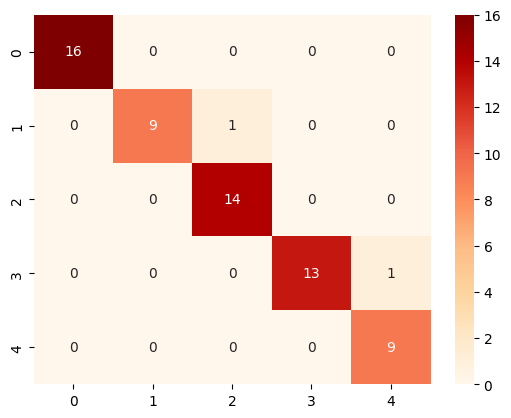

In [25]:
matrixdecision = confusion_matrix(y_test,y_predict)

sns.heatmap(matrixdecision,annot=True,cmap="OrRd")

In [26]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14
           3       1.00      0.93      0.96        14
           4       0.90      1.00      0.95         9

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.96        63
weighted avg       0.97      0.97      0.97        63



RANDOM FOREST CLASSIFIER
--

In [27]:
random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [28]:
random_forest.score(x_test,y_test)

0.9841269841269841

Confusion Matrix:


<Axes: >

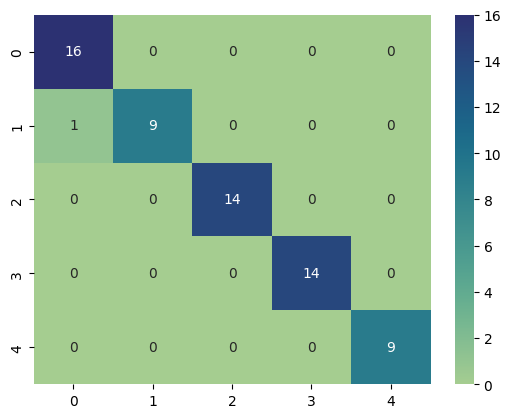

In [29]:
y_predict = random_forest.predict(x_test)

matrixrandom = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")

sns.heatmap(matrixrandom,annot=True,cmap="crest")

KNN Classifier
--

In [30]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=45)

In [31]:
knn.score(x_test,y_test)

1.0

In [32]:
y_predict = knn.predict(x_test)

matrix = confusion_matrix(y_test, y_predict)

In [33]:
reportknn = classification_report(y_test,y_predict)
print(reportknn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



<Axes: >

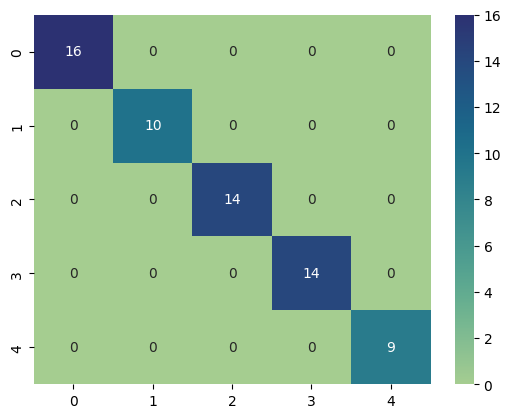

In [34]:
matrixknn = confusion_matrix(y_test,y_predict)
sns.heatmap(matrixknn,annot=True,cmap="crest")

SVM Classifier
--

In [35]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [36]:
svm.score(x_test,y_test)

1.0

<Axes: >

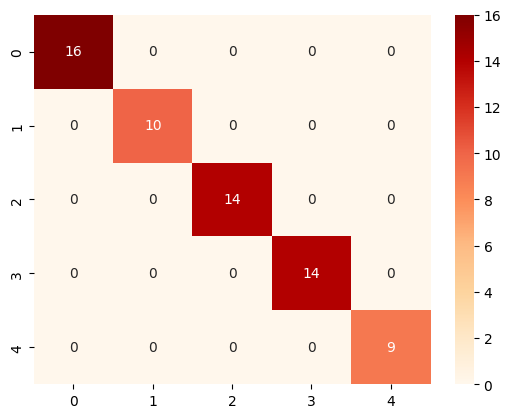

In [37]:
y_predict = svm.predict(x_test)

matrixsvm = confusion_matrix(y_test, y_predict)
sns.heatmap(matrixsvm,annot=True,cmap="OrRd")

In [38]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



Stress prediction

In [39]:
new_data = pd.DataFrame([[100.0, 29.0, 99.0, 35.0, 90.0, 95.0, 2.0, 80.0]] ,columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = svm.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Assuming you already have the 'predicted_stress_level' from the previous code snippet
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")


Predicted Stress Label for New Data: 4 ( High )


In [45]:
empty = pd.zeros(3)
empty[0] = 2
empty[1] = 3
empty_df = pd.DataFrame(columns=X.columns)
for n in empty:
    empty_df.append(n)


AttributeError: module 'pandas' has no attribute 'zeros'